# LINEAR DISCRIMINANT ANALYSIS

## BINARY LABELED DATA

### Exam A.1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
np.random.seed(12)

means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]

N1 = 50
N2 = 40
N = N1 + N2

X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)

# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

In [12]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


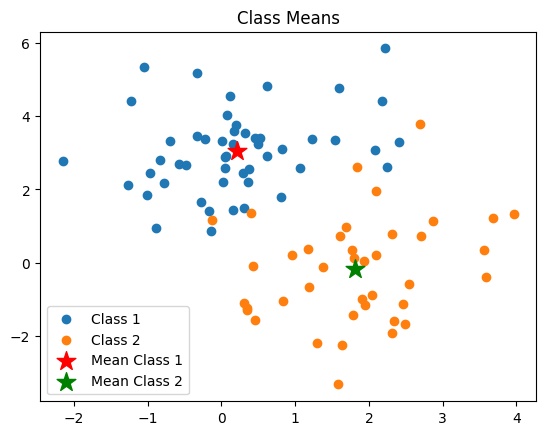

In [19]:
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [20]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [21]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:, 0]
print(w)
print(w.shape)

[-0.89596689 -0.44412085]
(2,)


(50,) (2,)
(2, 50) (2, 40)


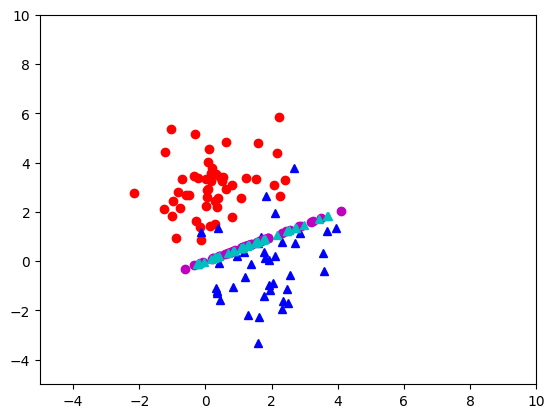

In [92]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

### Using SKLearn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components= 1)
print(X.shape, y.shape)
X_lda = lda.fit_transform(X, y)
y_pred = lda.predict(X)
y_pred


(90, 2) (90,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2.])

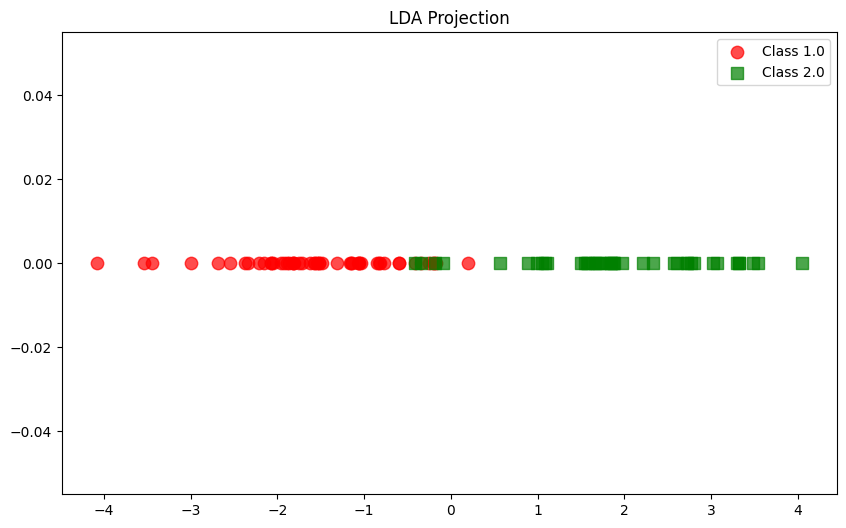

In [35]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, color, marker in zip(sorted(set(y)), colors, markers):
    plt.scatter(X_lda[y == i], [0] * sum(y == i), 
                color=color, marker=marker, label=f'Class {i}', 
                alpha=0.7, s=80)
plt.legend()
plt.title('LDA Projection')
plt.show()

### Exam A.2

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('D:\\Machine Learning\\LDA\\data\\pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [65]:
X = df.drop(['class', 'id'], axis=1)
y = df['class']

In [66]:
X.shape

(756, 753)

In [67]:
y.shape

(756,)

In [68]:
y.value_counts()

class
1    564
0    192
Name: count, dtype: int64

Data normalization PCA

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size= 500, random_state=42, stratify= y)


In [71]:
print(X_train.shape)
print(X_test.shape)

(500, 753)
(256, 753)


In [72]:
print(y_train.shape)
print(y_test.shape)

(500,)
(256,)


In [73]:
pca = PCA(n_components= 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.78515625
Confusion Matrix:
 [[ 19  46]
 [  9 182]]


LDA

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components= 1)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.72265625
Confusion Matrix:
 [[ 35  30]
 [ 41 150]]


## Visualize the results

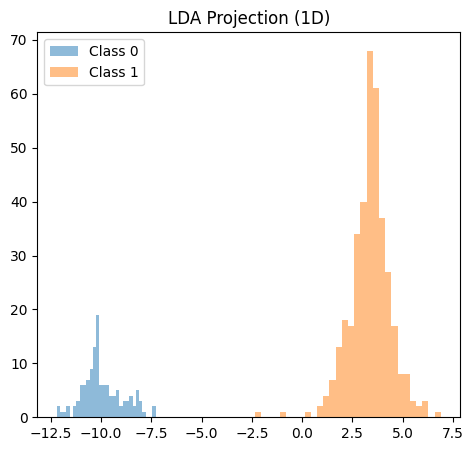

In [58]:
# LDA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    mask = y_train == label
    plt.hist(X_train_lda[mask], alpha=0.5, bins=30, label=f"Class {label}")
plt.title("LDA Projection (1D)")
plt.legend()

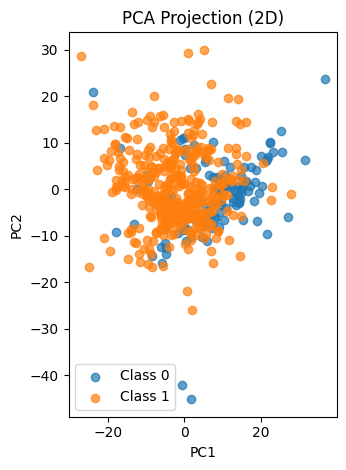

In [59]:
# PCA
plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    mask = y_train == label
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                alpha=0.7, label=f"Class {label}")
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

PCA explained variance ratio: [0.13156266 0.09143464]


Native

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.83984375
Confusion Matrix:
 [[ 40  25]
 [ 16 175]]


------------------------------------------------------------------------------------
Exam A.2.2

In [ ]:
df = pd.read_csv('D:\\Machine Learning\\LDA\\data\\pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [79]:
df.shape

(756, 755)

In [77]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'id'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)

(567, 753)
(189, 753)


### Naive Bayes Gaussian

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6772486772486772


### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7354497354497355


d:\Machine Learning\multinomial_logistic_regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using LDA and PCA

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [85]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# PCA
pca = PCA(n_components= 2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [87]:
# LDA

lda = LinearDiscriminantAnalysis(n_components= 1)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [88]:
# Naive Bayes
# PCA
nb = GaussianNB()

nb.fit(X_train_pca, y_train)
y_pred = nb.predict(X_test_pca)

print('PCA - Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))


# LDA

nb.fit(X_train_lda, y_train)

y_pred = nb.predict(X_test_lda)

print('LDA - Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))



PCA - Naive Bayes Accuracy: 0.7671957671957672
LDA - Naive Bayes Accuracy: 0.6825396825396826


In [89]:
# Logistic Regression
# PCA

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print('PCA - Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# LDA

lr.fit(X_train_lda, y_train)

y_pred = lr.predict(X_test_lda)

print('LDA - Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

PCA - Logistic Regression Accuracy: 0.7883597883597884
LDA - Logistic Regression Accuracy: 0.6878306878306878


### Visualize the results

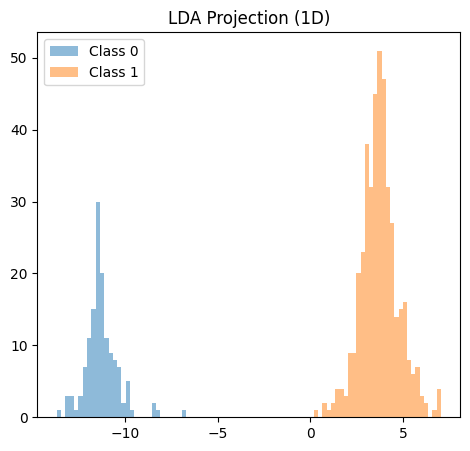

NameError: name 'plt' is not defined

In [1]:
# LDA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    mask = y_train == label
    plt.hist(X_train_lda[mask], alpha=0.5, bins=30, label=f"Class {label}")
plt.title("LDA Projection (1D)")
plt.legend()

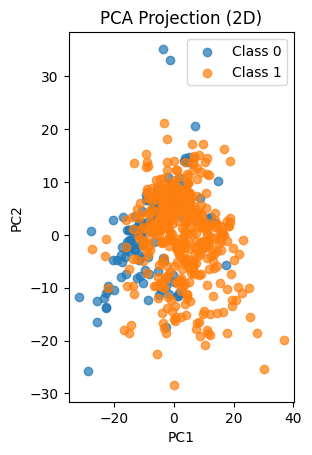

In [94]:
# PCA

plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    mask = y_train == label
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
                alpha=0.7, label=f"Class {label}")
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# Đánh giá
## 1
- Hai mô hình thì mô hình Hồi Quy Logistic cho kết quả tốt hơn so với mô hình Naive Bayes
- Khi sử dụng PCA và LDA thì mô hình Hồi Quy Logistic cho kết quả tốt hơn so với mô hình Naive Bayes
## 2
- Thay đổi dữ liệu nhiều nhất là PCA. Trong khi LDA giúp cải thiện dữ liệu đáng kể cho cả hai mô hình vì nó giữ lại thông tin tốt hơn
* PCA: Cả hai mô hình đều bị giảm độ chính xác. PCA chọn các thành phần chính dựa trên phương sai lớn nhất, nhưng có thể không giữ được cấu trúc phân lớp quan trọng.
* Dữ liệu LDA: Cả hai mô hình đều đạt độ chính xác 1.0, cho thấy LDA đã giúp tối ưu hóa phân tách giữa các lớp, làm cho dữ liệu dễ phân loại hơn

==> LDA tìm kiếm các chiều không gian tối ưu để phân biệt giữa các lớp, giúp cả hai mô hình hoạt động tốt hơn.

## ins B1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Read data from file
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

label_dict = {0: 'Setosa', 1: 'Versicolor', 2: 'Verginica'}

In [4]:
np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X_iris[y_iris==cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


In [5]:
S_W = np.zeros((4,4))

for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X_iris[y_iris == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat

print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [6]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X_iris, axis = 0)

#initialize zeros mnatrix
S_B = np.zeros((4,4))

#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X_iris[y_iris==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)
    
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8851]
 [-0.2946]
 [-0.2726]
 [-0.2356]]
Eigenvalue 3: 3.53e-15

Eigenvector 4: 
[[-0.8059]
 [ 0.4043]
 [ 0.4127]
 [-0.129 ]]
Eigenvalue 4: 3.17e-17


In [8]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])
    
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [9]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


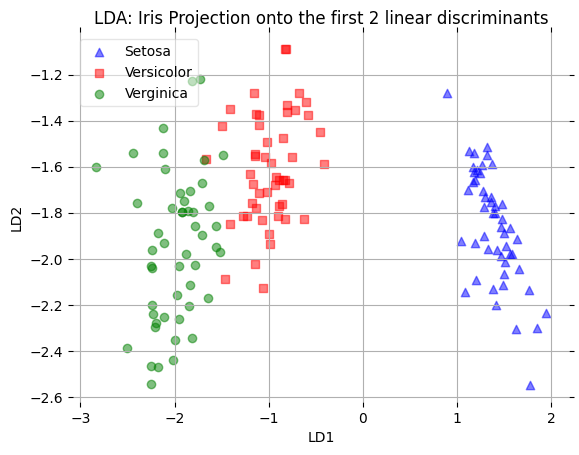

In [10]:
X_lda= X_iris.dot (W)

#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [y_iris== label],
            y= X_lda[:,1].real [y_iris ==label],
            marker = marker,
            color =color,
            alpha = 0.5,
            label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
                    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

explained variance ratio (first two components): %s [0.9246 0.0531]


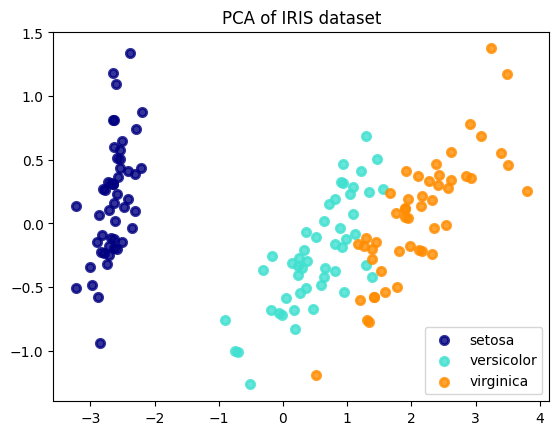

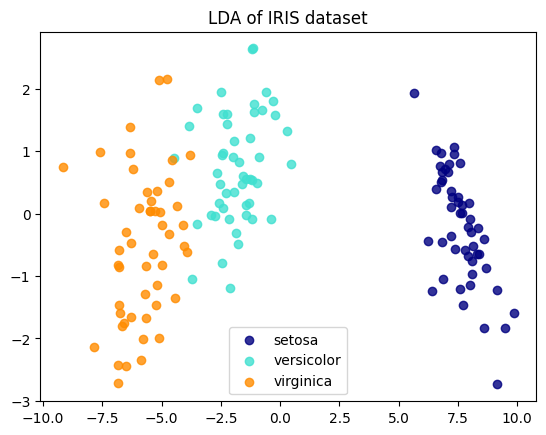

In [11]:
# Using sklearn
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
# Percentage of variance explained for each components
print("explained variance ratio (first two components): %s", str(pca.explained_variance_ratio_))

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
    X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
    X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [12]:
# split data into train and test sets

def train_test_iris(X, y):
    X_setosa = pd.DataFrame(X[y==0])
    X_versicolor = pd.DataFrame(X[y==1])
    X_virginica = pd.DataFrame(X[y==2])

    X_train = pd.concat([X_setosa[10:], X_versicolor[10:], X_virginica[10:]], axis=0)
    y_train = np.concatenate([y[10:50], y[60:100], y[110:150]], axis=0)

    X_test = pd.concat([X_setosa[:10], X_versicolor[:10], X_virginica[:10]], axis=0)
    y_test = np.concatenate([y[:10], y[50:60], y[100:110]], axis=0)
    
    return X_train, X_test, y_train, y_test

In [13]:
# using logistic regression

logR = LogisticRegression(multi_class='multinomial', solver='sag')

X_train, X_test, y_train, y_test = train_test_iris(X, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 1.0
Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
X_train, X_test, y_train, y_test = train_test_iris(X_r, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 0.9333333333333333
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
X_train, X_test, y_train, y_test = train_test_iris(X_r2, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 1.0
Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Độ chính xác của mô hình khi sử dụng phương pháp LDA tốt hơn phương pháp PCA.

- LDA : Accuracy: 1.0
- PCA : Accuracy: 0.9333333333333
  
Với dữ liệu nguyên bản thì LDA có cùng độ chính xác còn PCA thì thấp hơn.

- Nguyên bản : Accuracy: 1.0
- PCA : Accuracy: 0.9333333333333

## B2 EXAM

In [16]:
import os
import numpy as np
import warnings
import pandas as pd
import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

warnings.filterwarnings('ignore')

In [18]:
# set names to the paths because they're too long
data_path = 'D:\\Machine Learning\\LDA\\data\\Prac4'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [19]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
    
        images = images[rand_id, :]
        labels = labels[rand_id,]
    
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [20]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 5000, shuffle=True)

test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [ ]:
# split data into train and test
train_images = pd.DataFrame(train_images)
train_labels = pd.DataFrame(train_labels)
test_images = pd.DataFrame(test_images)
test_labels = pd.DataFrame(test_labels)

X = pd.concat([train_images, test_images], axis=0)
y = pd.concat([train_labels, test_labels], axis=0)

df = pd.concat([X, y], axis=1)
df_5000 = df.sample(5000, random_state=18)

In [22]:
X_5000 = df_5000.iloc[:, :-1]
y_5000 = df_5000.iloc[:, -1]

In [23]:
# PCA giảm chiều dữ liệu về 100
pca = PCA(n_components=100)

X_pca = pca.fit_transform(X_5000)

In [24]:
# using logistic regression
logR = LogisticRegression(multi_class='multinomial', solver='sag')


Áp dụng phương pháp Multinomial Logistic Regression để phân loại.

Tỷ lệ train:test là 0.7:0.3.

So sánh độ chính xác và thời gian chạy mô hình trong các trường hợp:

In [25]:
# Dữ liệu ban đầu
X_train, X_test, y_train, y_test = train_test_split(X_5000, y_5000, test_size=0.3, random_state=18)

start_time = time.time()

logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)

end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Run time:", end_time - start_time)

Accuracy: 0.8993333333333333
Run time: 7.398991584777832


In [26]:
# Dữ liệu PCA 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_5000, test_size=0.3, random_state=18)

start_time = time.time()

logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)

end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Run time:", end_time - start_time)

Accuracy: 0.8726666666666667
Run time: 0.8480606079101562


In [27]:
# Dữ liệu LDA 
lda = LinearDiscriminantAnalysis(n_components=8)

X_lda = lda.fit_transform(X_5000, y_5000)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y_5000, test_size=0.3, random_state=18)

start_time = time.time()

logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)

end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Run time:", end_time - start_time)

Accuracy: 0.9266666666666666
Run time: 0.11307168006896973


Từ kết quả chạy ta thấy dữ liệu sau khi giảm chiều bằng phương pháp LDA xong chia dữ liệu cho độ chính xác cao hơn so với sử dụng phương pháp PCA và dữ liệu ban đầu.

=> Nên phương pháp LDA là phù hợp nhất.

## B4 EXAM

In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [38]:
path = 'D:/Machine Learning/LDA/data/face_data/'

ids = range(1, 16) # 15 people

states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'

In [39]:
# open one picture to get the image's size

fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn)

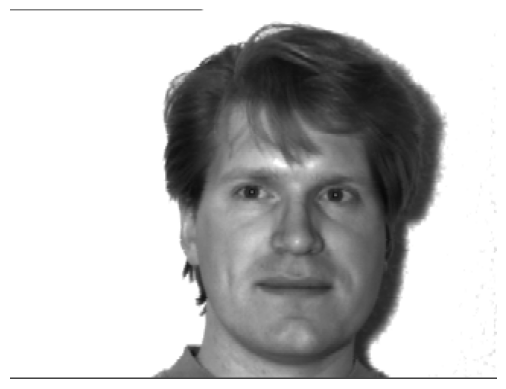

In [40]:
plt.imshow(im, cmap='gray')
plt.axis('off')  # Ẩn trục tọa độ
plt.show()

In [41]:
h = im.shape[0]
w = im.shape[1]

D = h * w
N = len(states) * 15
print(N, D, h , w)

165 77760 243 320


In [42]:
X = np.zeros((D, N))
y = []

# collect all data
count = 0

for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # open the file and read as gray image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        y.append(state)
        count += 1

In [43]:
# convert X to dataframe
X_1 = pd.DataFrame(X.T)
X_1.head()

,0,1,2,3,4,5,6,7,8,9,...,77750,77751,77752,77753,77754,77755,77756,77757,77758,77759
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0


In [44]:
y = pd.Series(y)
y.shape

(165,)

In [45]:
df = pd.concat([X_1, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,77751,77752,77753,77754,77755,77756,77757,77758,77759,0
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,centerlight
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,glasses
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,happy
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,leftlight
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,noglasses


In [46]:
encoder = LabelEncoder()
df.iloc[:, -1] = encoder.fit_transform(df.iloc[:, -1])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,77751,77752,77753,77754,77755,77756,77757,77758,77759,0
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,1
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,2
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,3
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,4


In [47]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

In [48]:
y_df = y_df.astype(int)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77750,77751,77752,77753,77754,77755,77756,77757,77758,77759
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0


In [49]:
# PCA giảm chiều dữ liệu về 135
pca = PCA(n_components=135)

X_df_pca = pd.DataFrame(pca.fit_transform(X_df))
X_df_pca.shape

(165, 135)

In [50]:
# Using logistic regression and Naive Bayes 
logR = LogisticRegression(multi_class='multinomial', solver='sag')
nb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X_df_pca, y_df, test_size=0.3, random_state=18)


In [51]:
# logistic regression
logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)
print(accuracy_score(y_test, y_pred_logR))

0.24


In [52]:
# naive bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.18
